In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, auc



In [20]:
df=pd.read_csv("preprocessed_data.csv")
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0.505353,0.545455,0.200000,0.000000,0.000000,1.0,1.0,0.506735,1
1,0.481799,0.522727,0.100000,0.334031,0.000000,0.0,1.0,0.562709,0
2,0.254818,0.545455,0.800000,0.636357,0.800000,1.0,0.0,0.569654,1
3,0.676660,0.477273,0.100000,0.000000,0.400000,0.0,0.0,0.469120,0
4,1.000000,0.568182,0.200000,0.500246,0.000000,1.0,1.0,0.395400,0
...,...,...,...,...,...,...,...,...,...
15921,0.796021,0.635139,0.294613,0.444239,0.800000,1.0,0.0,0.800099,1
15922,0.141680,0.920881,0.690375,0.499893,0.000000,1.0,0.0,0.252670,1
15923,0.573911,0.332799,0.258921,0.482150,0.000000,0.0,1.0,0.826455,1
15924,0.611469,0.556419,0.162646,0.000000,0.874707,1.0,0.0,0.375351,1


In [21]:
x=df.drop(columns='churn')
y=df['churn']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.20)


In [23]:
sc = StandardScaler()
x_train_rescaled = sc.fit_transform(x_train)
x_test_rescaled = sc.transform(x_test)


In [24]:
# Define the XGBClassifier
xgb = XGBClassifier()

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV with rescaled data
grid_search.fit(x_train_rescaled, y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
final_xgb = XGBClassifier(**best_params)

# Train the final model
final_xgb.fit(x_train_rescaled, y_train)

# Make predictions on the test set
xgb_y_pred = final_xgb.predict(x_test_rescaled)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, xgb_y_pred)
print("Accuracy:", accuracy * 100)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100}
Best Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100}
Accuracy: 89.95605775266792


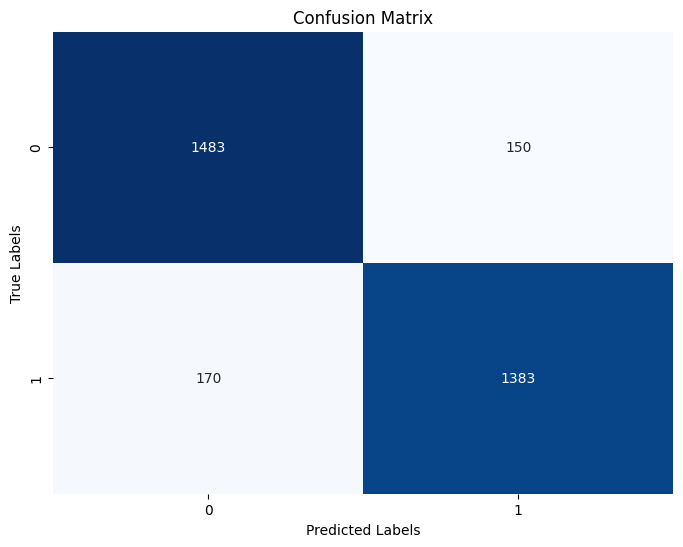

In [26]:

# Confusion Matrix
cm = confusion_matrix(y_test, xgb_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [27]:
# Classification Report
class_report = classification_report(y_test, xgb_y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1633
           1       0.90      0.89      0.90      1553

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



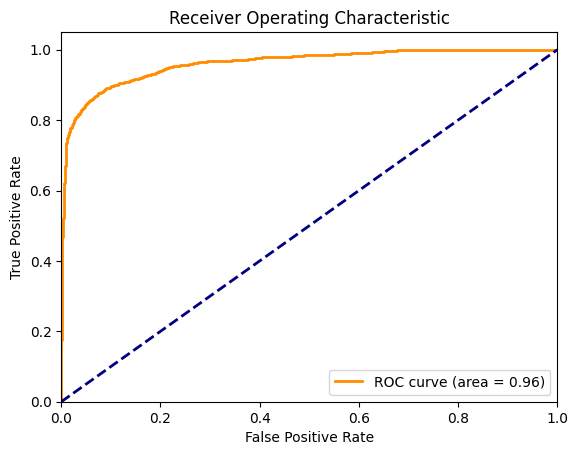

AUC Score: 0.9615078415282985


In [28]:


# ROC Curve and AUC Score
y_pred_proba = final_xgb.predict_proba(x_test_rescaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)